# A basic supervised exercise

# 1. Goal of the exercise

In this exercise you will practice the basic pipeline of the supervised learning task. Implement a simple regressor. And will try to solve several hinderances found in the process.

# 2. Deliverables
As you progress in this exercise, you will find several questions you are expected to answer them properly with adequate figures when required and deliver this notebook with all these evidences in due time. The notebook must include all necessary code to generate the evidences as well as the discussion of the answers



<div class = "alert alert-danger" style="border-radius:10px"> **IMPORTANT:** Write in the next cell the name of the people that answer this notebook
</div>

Felix Altenberger, Emanuel Sanches, Pablo Reynoso

# 3. Our first regressor

We are given the data in ’reg_data_set1.pkl’(univariate basic dataset) our goal is to predict the $y$ value. Our first model to try is linear regression as explained in ”A gentle introduction to supervised learning”.


## A. Data set analysis
Load the dataset and describe the basic properties of the data,

<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 1:** Draw a scatter plot showing the data $x$ in the set with their corresponding $y$ values.
<p>
**HINT:** Next cell reads the file and imports module `matplotlib`. This module allows you to plot lines, scatter plots, dots, etc. Check `plt.scatter` and `plt.plot` for solving this exercise.
</div>

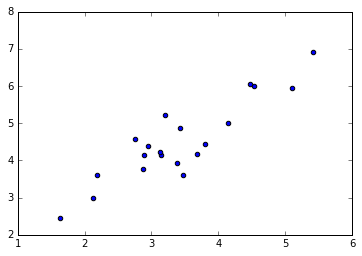

In [168]:
# Your code here
f = open('reg_data_set1.pkl','r')
import pickle as pickle
x,y=pickle.load(f)
f.close()
%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)


## B. Analytical solution for the linear regression method.
In this part, you are expected to implement the analytical version of linear regression using a least mean squared error loss.

<div class = "alert alert-success" style = "border-radius:10px"> <b>QUESTION BLOCK 2:</b>
<ol>
<li>Which is the optimal value of the linear regression weights? </li>
<li>Plot the data set and the line learned by the model. Does it looks like a good
linear approximation?</li>
</ol>
<p>
** HINT: ** The `numpy` module is your best friend here. Dot product can be called using `np.dot` function. If you need to concatenate data you may use `np.c_`, `np.concatenate`, or `np.vstack`/`np.hstack`.
</div>

In [169]:
# Your code 1
import numpy as np
def ana_sol(x,y):
    x_pinv = np.linalg.pinv(x)
    w = np.dot(x_pinv, y)
    return w
mat1 = np.array([[1]]*len(x))
x_til = np.concatenate((mat1, x), axis=1)
w = ana_sol(x_til,y)

1.: The optimal values of the weights are w0=1.04015457 and w1=1.02081691 

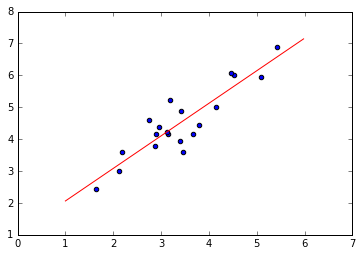

In [170]:
assert w.shape==(2,1),'The shape of the weight vector must be (2,1)'

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.hold('on')

def f(x,w):
    return w[0]+x*w[1]

#x_draw = np.arange(1.0, 7.0, 0.02)
plt.plot(x_draw,f(x_draw,w),'r')

#the given code below also draws the model. We prefer using our own code though, since it is easier to understand and the outcome looks better
#x_draw = np.linspace(0,8,100)
#x_draw = np.c_[x_draw,np.ones((x_draw.shape[0],1))]
#plt.plot(x_draw[:,0],np.dot(x_draw,w))

2.: The model approximates the smallest/highest values quite well and seems to go right through the middle of the big cluster, as it can be seen above.
Therefore we believe it to be a pretty good linear approximation. 

## C. Linear regression and the descent method.
In this part, you are expected to implement the basic gradient descent version for optimizing linear regression with fixed learning rate.
<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 3:**
<ol>
<li>Which is the optimal value of the linear regression weights using the descent method?</li>
<li>Which are the parameters of the descent method used to obtain the optimal value? i.e. learning rate value, number of iterations.</li>
<li>Plot the convergence curve of the method (The value of the objective function with respect to the number of iterations).</li>
<li>Zoom in the flat convergence part. Does it oscillate? Why?</li>
<li>Change the learning rate to 0.1. Plot the convergence curve of the method.</li>
</ol>
</div>


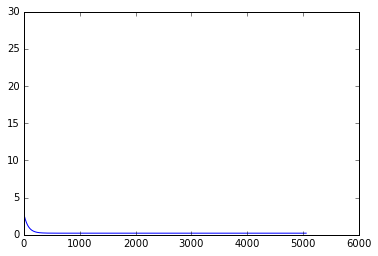

In [171]:
# Your code here
#1 
def grad_desc(x,y,w,t,tau):
    N = len(x)
    for i in range(tau):
        gJ = [0,0] #Gradient of the cost function J
        for i in range(N):
            gJ_temp = w[0]+w[1]*x[i][0]-y[i][0]
            gJ[0] += gJ_temp
            gJ[1] += gJ_temp*x[i][0]
        gJ = [gj/N for gj in gJ]
        w[0],w[1] = w[0]-t*gJ[0], w[1]-t*gJ[1]
    return w

def obj_func(x,y,w):
    value,N = 0,len(x)
    for i in range(N):
        value += (x[i][0]*w[1]+w[0]-y[i][0])**2
    return value/N

def conv_curve(x,y,w,t,tau_min,tau_max):
    import numpy as np
    import matplotlib.pyplot as plt
    taus = range(tau_max-tau_min)
    obj_func_values=[0]*len(taus)
    w = grad_desc(x,y,w,t,tau_min)
    for i in taus:
        obj_func_values[i] = obj_func(x,y,grad_desc(x,y,w,t,1))
    plt.plot(range(tau_min, tau_max),obj_func_values)    

#run
w,t,tau_min,tau_max = [10,10], 0.1, 1, 5059
conv_curve(x,y,w,t,tau_min, tau_max)
#grad_desc(x,y,w,t,tau_max)
#print(w)



1. The optimal wheights are w0=1.0401545677991499 and w1=1.0208169139494963, which is equal to the analytical solution.
2. We obtained those values by performing 5059 iterations with a learning rate of 0.1 and an initial w of [10,10]. Performoing more than 5059 iterations does not change the weights anymore, since the gained accuracy does not affect the first 17 digits.
3. The whole convergence curve can be seen above.
4. The convergence part does not osziliate. The reason for this is that the gradient is getting smaller if we get closer to a local minimum and therefore the convergence of w is "onesided", i.e. the graph is falling monotonously.
5. See 3.




Modify the descent algorithm so that your descent direction is
$$\Delta x= − \frac{\nabla f(x)} {\|\nabla f (x)\|_2}$$

<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 4:**
<ol>
<li>Which is the optimal value of the linear regression weights using the modified descent method?</li>
<li> Which are the parameters of the descent method used to obtain the optimal value? i.e. learning rate value, number of iterations.</li>
<li> Plot the convergence curve of the method (The value of the objective function with respect to the number of iterations). </li>
<li> Zoom in the flat convergence part. Does it oscillate? Why? </li>
</ol>
<p>
**HINT:** The norm of a vector can be found invoking `np.linalg.norm`.

</div>

[1.0533533876527021, 1.0690433709463778]


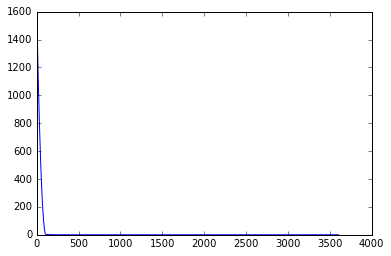

In [172]:
def grad_desc(x,y,w,t,tau):
    import numpy as np
    N = len(x)
    for i in range(tau):
        gJ = [0,0]
        for i in range(N):
            gJ_temp = w[0]+w[1]*x[i][0]-y[i][0]
            gJ[0] += gJ_temp
            gJ[1] += gJ_temp*x[i][0]
        gJ = [gj/N for gj in gJ]
        gJ_norm = np.linalg.norm(gJ)
        gJ = [gj/gJ_norm for gj in gJ]
        w[0],w[1] = w[0]-t*gJ[0], w[1]-t*gJ[1]
    return w

w,t,tau_min,tau_max = [10,10], 0.1, 1, 3608
conv_curve(x,y,w,t,tau_min, tau_max)
print w


1. The optimal weights are in the following intervals w0:[1.0269557479455713, 1.0533533876527021] and w1:[0.97259045695259272, 1.0690433709463778]
2. We obtained those values by performing 3605/3606 iterations with a learning rate of 0.1 and an initial w of [10,10]. Performing more iterations than that does not change the weights anymore (apart from the osziliation), since the gained accuracy does not affect the first 17 digits. Lowering the learning rate would reduce the osziliation and therefore give us smaller intervalls (=better approximation) for the optimal weights, but we decided to use 0.1 again, so that the effect of norming the gradient can be observed the best.
3. The whole convergence curve can be seen above.
4. The convergence part does osziliate. The reason for this is that norming the gradient prevents it from getting smaller if we get closer to a local minimum and therefore it will "jump over" the minimum at some point.

## D. A second model.

Consider now a polynomial model of degree p for the univariate case, i.e. $f(x;w) = w_0 + w_1x+w_2x^2 +· · ·+w_px^p$. Observe that it can be expressed as a linear combination of transformed data points $z = \{1,x,x^2,...,x^p\}$,

$$
f(x;w) = \sum_{i=0}^p w_i x^i = \sum_{i=0}^p w_i z_i = {\bf w}^T{\bf z}
$$

<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 5:**
<ol>
<li>Transform the training set into the set with examples described by z considering p = 3. Apply, the analytic solution code (if properly coded it should work without modifications). Which is the optimal value of the weights?</li>
<li> Plot the data set and the curve just found. Does it fit better the data? Why?</li>
</ol>
</div>


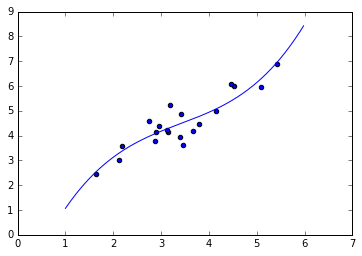

In [173]:
def calc_z(x,p):
    import numpy as np
    z_temp = [0]*(p+1)
    for i in range(p+1):
        z_temp[i]=np.array([v**i for v in x])
    z = z_temp[0]
    for i in range(1,p+1):
        z = np.concatenate((z,z_temp[i]), axis=1)
    return z

def obj_fun(v,w,p):
    fx = 0
    for i in range(p+1):
        fx+=w[i]*v**i
    return fx

p=3
z = calc_z(x,p)
w = ana_sol(z,y)

%matplotlib inline
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.hold('on')
x_draw = np.arange(1.0, 6.0, 0.02)
plt.plot(x_draw,obj_fun(x_draw,w,p),'b')

1. The optimal values of the weights are w0=-2.72757079, w1=4.90043255, w2=-1.22723706 and w3=0.12035158. 
2. The plot can be seen above. The curve fits the data better than the linear model, because the underlying approximation is of order 3, instead of order 1. Therefore it can approximate the given data more closely.

## E. Evaluating a model.

Data set `reg_data_set2.mat` is a small set for regression. In this exercise we just want to select the best model among the following $p = 1, 2, . . . , 6$. The best fit is given by the polynomial displaying smaller RMS (root mean square) value. RMS is defined as the squared loss for the data considered
􏰋􏰊􏰊􏰈$$
RMS = \sqrt{\frac{1}{N}\sum_{i=0}^N (f(x_i;w)-y_i)^2}
$$


<p>
<div class = "alert alert-success" style = "border-radius:10px"> **QUESTION BLOCK 6:**
<ol>
<li>Use the first half of the data set for training and the second half for validation.</li>
<li> Optimize the models (you can use any of the methods implemented before) and
plot the validation set and the 6 models plots.</li>
<li> Plot the training set and the 6 models plots.</li>
<li> Compute the RMS error on the training set and on the validation set. Plot both
error curves and describe their behavior. </li>
<li> Does the selected model agrees with the model that performs the best on the
training set? Which one do you think is the optimal choice? Why? (You are not supposed to give an exhaustive answer to this question but your impressions and ideas. We will see the reasons why this effect happens shortly.)</li>
</ol>
</div>


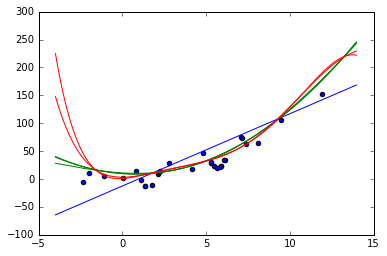

In [174]:
def calc6_z_w(x,y):
    z,w=[0]*6,[0]*6
    for p in range(6):
        z[p] = calc_z(x,p+1)
        w[p] = ana_sol(z[p],y)
    return z,w

def plot6(x,y,w):
    %matplotlib inline
    import matplotlib.pyplot as plt
    plt.scatter(x,y)
    for i in range(6):
        if i < 1:
            col = 'b'
        elif i < 4:
            col = 'g'
        else:
            col = 'r'
        plt.hold('on')
        x_draw = np.arange(-4.0, 14.0, 0.02)
        plt.plot(x_draw,obj_fun(x_draw,w[i],i+1),col)
        
def rms(x,y,w,p):
    import math
    value,N = 0,len(x)
    for i in range(N):
        value += (obj_fun(x[i],w,p)-y[i])**2
    return math.sqrt(value/N)

def plot_rms6(x,w,y):
    %matplotlib inline
    import matplotlib.pyplot as plt
    x_draw,y_draw = range(1,7),[0]*6
    for p in x_draw:
        y_draw[p-1] = rms(x,y,w[p-1],p)
    plt.plot(x_draw,y_draw,'b')
    
        
f = open('reg_data_set2.pkl','r')
import pickle as pickle
x,y=pickle.load(f)
f.close()        
#1.
xs, ys = len(x)/2,len(y)/2
x_tr, x_val, y_tr, y_val = x[:xs],x[xs:],y[:ys],y[ys:]    
z,w = calc6_z_w(x_tr,y_tr)
#2.
plot6(x_val,y_val,w)
#3.
#plot6(x_tr,y_tr,w)
#4.
#plot_rms6(x_tr,w,y_tr)
#plot_rms6(x_val,w,y_val)


2 and 3: The plot of the models with the validation set can be seen above. The blue curve represents order 1, the green ones orders 2, 3 and 4 and the red ones orders 5 and 6. The colors represent the following: green=good approximation, blue=underfitting, red=overfitting

4 and 5: The model that does best on the training set according to the RMS error is (unsurprisingly) p=6. The model that does best on the validation set however is p=4. The optimal choice would therefore be p=4, because it can approximate new values the best (at least according to the validation set). The reason for why p=6 performs worse than p=4 on new data is called overfitting, which means that p=6 tries to match the training set more closely than the actual underlying function, which worsens predictions for new values.